# ANN (ARTIFICIAL NEURAL NETWORK)-PROJECT OVERVIEW
* This neural network project aims to **predict whether a customer will make a purchase based on their browsing behaviour and other characteristics**.

* The project uses a neural network algorithm and features such as **time spent on page, number of pages viewed, and device type to make predictions**.
* 
In this project, We will explore the Online Shoppers Purchasing Intenion.

*  The aim of this project is to understand the data and predict whether a visitor will make a purchase ornot


# Import libraries
##### The first step is to import the necessary libraries used in this project. For working with the Artificial Neural Network, We are using Keras with Tensorflow backend.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Import dataset
##### Next step is to import the dataset and get basic information from it. As the dataset given to us is in the form of csv file we are reading the file using read_csv

In [3]:
data=pd.read_csv(r"C:\Users\anush\CNN PROJECT\online_shoppers_intention.csv")

# Performing EDA(Exploratory Data Analysis)

✅ Helps understand the dataset

✅ Detects missing values & outliers

✅ Identifies patterns & trends

✅ Helps select the right ML/DL model

#### data_head() prints the first five columns in the dataset

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### data_sample() prints the random samples of the overall dataset(population).
#### As we mentioned the sample value as 5, randomly 5 samples will be printed.

In [5]:
data.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4932,2,57.0,0,0.0,28,724.066667,0.007407,0.017284,32.985333,0.0,May,1,1,1,4,Returning_Visitor,False,True
640,3,86.0,0,0.0,22,1187.833333,0.009091,0.027273,0.000000,0.0,Mar,3,2,3,1,Returning_Visitor,True,False
825,0,0.0,0,0.0,51,5818.916667,0.000980,0.022985,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
2401,0,0.0,0,0.0,13,454.500000,0.000000,0.016667,0.000000,0.0,May,3,2,4,13,Returning_Visitor,False,False
6385,1,11.0,0,0.0,2,51.066667,0.000000,0.000000,0.000000,0.0,June,2,2,9,6,Returning_Visitor,False,False


#### .shape prints the size of the dataset ie, Number of rows and columns.

In [6]:
data.shape

(12330, 18)

#### .info() function in Pandas provides a summary of a DataFrame, including:

✅ Number of rows & columns

✅ Column names and their data types

✅ Number of non-null values in each column

✅ Memory usage of the DataFrame

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Seems like all cells are filled and there are no missing values. Also, the time spent on a certain type of page would generally correlate with the number of that type of pages visited. Hence, We can **drop** the number of each type of **page visited** and just **keep the duration columns**. We can also check the description of the columns to understand the range of each column.

In [9]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### .describe function uses

✅ Understand data distribution

✅ Detect outliers & missing values

✅ Check central tendency (mean, median)

✅ Find spread & variability (std, min-max)

In [10]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


The mean of each column is very much varied from one another and hence scaling should help with it. Considering that Revenue is the target column, we can split the dataset into test and train sets.

# Splitting the datasets into train and test sets 

.iloc is a function in Pandas which is used to select rows and columns based on their integer index positions.

In [11]:
#Extracts Features (X) and Target (y)
X = data.iloc[:, :-1]#select all columns except the last one 
y = data.iloc[:, -1]#Selects only the last column (target variable)
#Splitting into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#train_test_split() → Splits data into training (80%) and testing (20%).
#test_size=0.2 → 20% of the data is used for testing.
#random_state=42 → Ensures consistent results each time you run the code.
X_train.reset_index(inplace = True)
X_test.reset_index(inplace = True)
#.reset_index(inplace=True) → Resets the index after splitting, preventing issues caused by shuffled indexes.

# Data analysis and Visualization
Let's take a deep dive and try to understand the dataset through visualizations.

## Target column
The first step is to take a look at the distribution of the data between the two classes.

Text(0.5, 1.0, 'Count of visitors based on revenue generated')

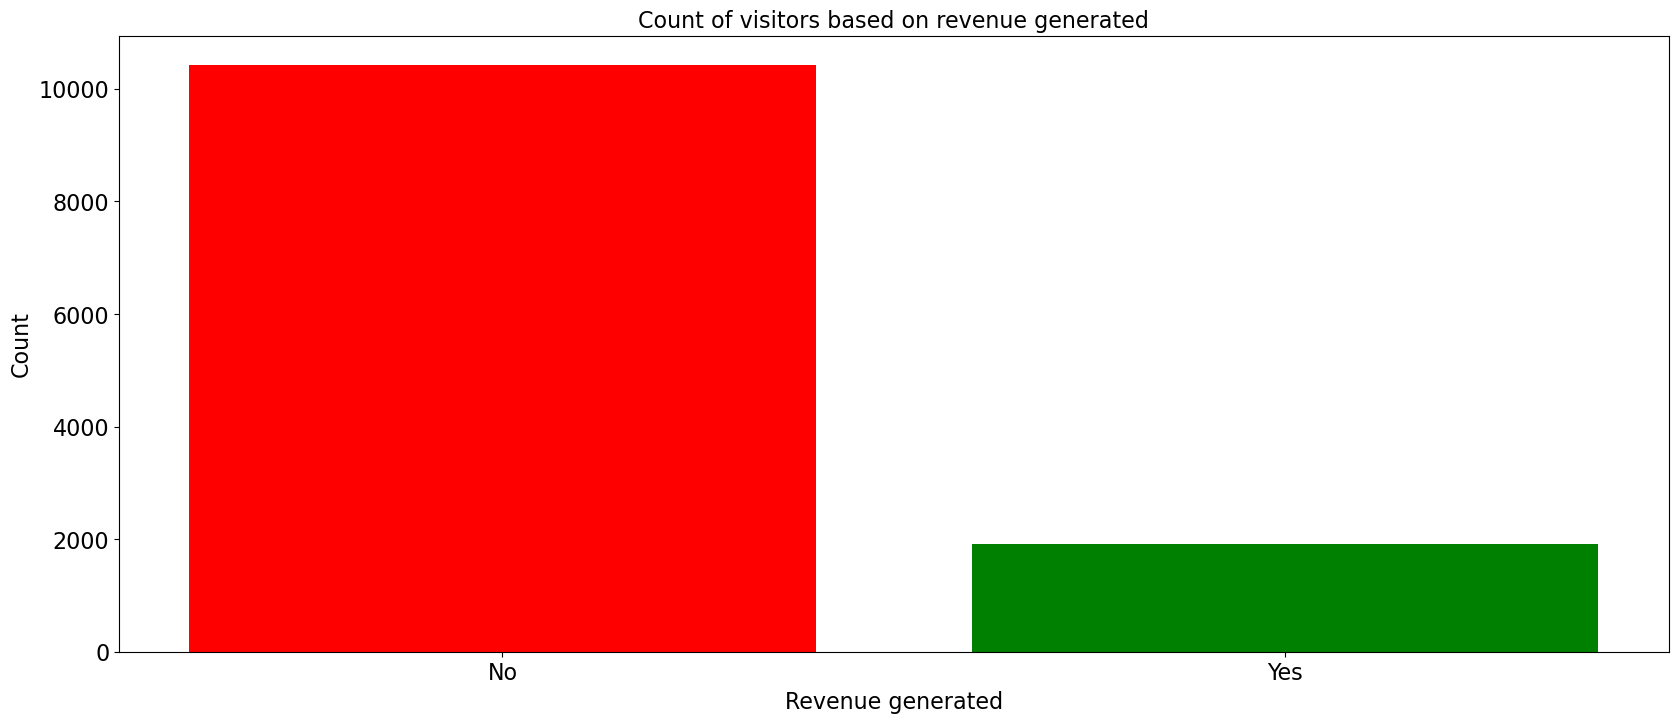

In [12]:
#Counting the occurences of each target values 
#value_counts() → Counts how many times each unique value appears in y.
target_distribution = y.value_counts()
#Create a Figure for the Plot
plt.figure(figsize = (20, 8))
#Create a Bar Chart
#target_distribution.keys().tolist() → Gets unique values of y (e.g., [0, 1]).
#target_distribution.tolist() → Gets the count of each unique value.
#color=['red', 'green'] → Sets 0 (No) as red and 1 (Yes) as green.
plt.bar(target_distribution.keys().tolist(), target_distribution.tolist(), color = ['red', 'green'])
#Label the Axes
plt.xlabel('Revenue generated', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks([0.0, 1.0], ['No', 'Yes'], fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Count of visitors based on revenue generated', fontsize = 16)

As is clear from the bar plot above, the dataset includes majority of feature values that resulted in no revenue generation. The dataset is highly unbalanced and this is where we'd have to create an efficient model that can still classify between the two classes.

# Correlation matrix
We can directly analyse the matrix rather than using a plotting library to create a correlation plot. However, to quickly analyse the output, We can use the coolwarm cmap.

In [13]:
corr = data.select_dtypes(include=['number']).corr()
corr.style.background_gradient(cmap='coolwarm')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301


It appears that **PageValues** is the **most linearly correlated with our target value**. Also, features such as **OperatingSystems, Region and TrafficType have correlation less than 0.02, so we can drop these columns**.

The relation between **Administrative and Administrative_Duration, Informational and Informational_Duration and ProductRelated and ProductRelated_Duration** appear to have **very high correlation as can be seen in the correlation matrix** This is expected as the **duration spent on a type of page would surely be influenced by the number of that type of page visited**. 

Thus, we can remove the number of pages visited of each type.

# Data engineering
We can remove redundant columns, and update existing columns.

## Remove columns
We can remove columns that appear to be redundant and provide no useful information towards the target class. We will begin by dropping the count of each page visited.

In [14]:
X_train = X_train.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)
X_test = X_test.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)

We can also removee columns that have less than 0.02 and more than -0.02 correlation with target values.

In [15]:
X_train.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)
X_test.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)

# Encoding categorical columns
Next, We can use LabelEncoder and OneHotEncoder on categorical columns.

In [16]:
labelEncoder = LabelEncoder()
#Month- Encodes months into numbers (e.g., 'Jan' → 0, 'Feb' → 1, etc.)
#VisitorType- Converts categories like 'Returning_Visitor', 'New_Visitor', or 'Other' into numbers.
#Weekend- Transforms boolean values (True/False) into 1/0.
X_train.loc[:, 'Month'] = labelEncoder.fit_transform(X_train.loc[:, 'Month'])
X_test.loc[:, 'Month'] = labelEncoder.transform(X_test.loc[:, 'Month'])
X_train.loc[:, 'VisitorType'] = labelEncoder.fit_transform(X_train.loc[:, 'VisitorType'])
X_test.loc[:, 'VisitorType'] = labelEncoder.transform(X_test.loc[:, 'VisitorType'])
X_train.loc[:, 'Weekend'] = labelEncoder.fit_transform(X_train.loc[:, 'Weekend'])
X_test.loc[:, 'Weekend'] = labelEncoder.transform(X_test.loc[:, 'Weekend'])

Once the labels are encoded, We can use OneHotEncoder to create separate columns for each class in the columns then drop the first column for each class and append the new columns to train and test data, once the original columns are removed.

In [17]:
#categories='auto': Automatically detects unique categories.
#drop='first': Drops the first category from each feature to avoid the dummy variable trap (which helps prevent multicollinearity).
onehotencoder = OneHotEncoder(categories = 'auto', drop = 'first')
#Encoding Training Features:
#.fit_transform(): Fits the encoder on training data and transforms it into one-hot encoded arrays.
#.toarray(): Converts sparse matrix to NumPy array.
#pd.DataFrame(): Converts the encoded features into a DataFrame.
train_cat_features = onehotencoder.fit_transform(X_train.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
train_cat_features = pd.DataFrame(train_cat_features)
#Encoding Test Features:
#Only transform() is used on the test data (no fitting, to avoid data leakage).
test_cat_features = onehotencoder.transform(X_test.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
test_cat_features = pd.DataFrame(test_cat_features)
#Dropping Original Categorical Columns:
X_train.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
X_train = X_train.join(train_cat_features)
X_test.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
X_test = X_test.join(test_cat_features)

# Scaling the data
After removing some columns, We can now scale the columns to have mean 0.

In [18]:
#Joining Encoded Features Back:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [19]:
from sklearn.preprocessing import StandardScaler
#Initialize the Scaler:
standardScaler = StandardScaler()
#Fit & Transform the Training Set:
#Fit: Calculates the mean and standard deviation of each feature from X_train.
#Transform: Uses those statistics to standardize the data
X_train = standardScaler.fit_transform(X_train)
#Transform the Test Set:
#Only transform() is applied here (no fitting) to avoid data leakage — the test set must be scaled using the same statistics as the training set.
X_test = standardScaler.transform(X_test)

# Model Generation
Creating the Artificial Neural Network now. network is created with many layers.

In [20]:
#Model Initialization
classifier = Sequential()
#Input Layer + First Hidden Layer
#Dense(units=128): Fully connected layer with 128 neurons.
#activation='relu': ReLU activation function (best practice for hidden layers).
#input_dim=32: The input layer expects 32 features.
#Dropout(rate=0.6): Drops 60% of neurons randomly during training to prevent overfitting.
classifier.add(Dense(units = 128, activation = 'relu', input_dim = 32))
classifier.add(Dropout(rate = 0.6))
#Second Hidden Layer
#Another dense layer with 128 neurons and 60% dropout.
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
#Third Hidden Layer
#More neurons (256) are added, increasing model complexity.
#Dropout is applied again to prevent overfitting.
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
#Fourth Hidden Layer:
#Drops 40% of neurons.
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.4))
#Output Layer
#units=1: Since this is a binary classification task, only one neuron is needed.
#activation='sigmoid': Outputs probability between 0 and 1.
classifier.add(Dense(units = 1, activation = 'sigmoid'))
#Compiling the Model:
#optimizer='adam' Adaptive learning rate optimization.
#loss='binary_crossentropy' Suitable for binary classification.
#metrics='accuracy' Tracks model accuracy during training.
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

C:\Users\anush\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,785 (339.00 KB)

 Trainable params: 86,785 (339.00 KB)

 Non-trainable params: 0 (0.00 B)

# Training and Evaluating the Model
We can now train the model with the train data and the validation data as 10% of the train data.

In [21]:
history = classifier.fit(X_train, y_train, epochs = 30, shuffle = True, validation_split = 0.1)
#X_train-Training features
#y_train-Training labels
#Epochs-Number of full passes through the dataset
#shuffle=false Whether to shuffle the data before each epoch
#Validation_split=0.1,Use 10% of training data for validation

Epoch 1/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8259 - loss: 0.4735 - val_accuracy: 0.8754 - val_loss: 0.3215
Epoch 2/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8622 - loss: 0.3506 - val_accuracy: 0.8835 - val_loss: 0.3045
Epoch 3/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.3116 - val_accuracy: 0.8804 - val_loss: 0.2830
Epoch 4/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8893 - loss: 0.2968 - val_accuracy: 0.8835 - val_loss: 0.2690
Epoch 5/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8894 - loss: 0.2849 - val_accuracy: 0.8875 - val_loss: 0.2625
Epoch 6/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8946 - loss: 0.2819 - val_accuracy: 0.8936 - val_loss: 0.2729
Epoch 7/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8885 - loss: 0.2735 - val_accuracy: 0.8896 - val_loss: 0.2637
Epoch 8/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8938 - loss: 0.2702 - val_accuracy: 0.

We can give the output the prediction on the test data and evaluate the Confusion Matrix and Accuracy.

In [22]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion matrix:
[[1986   69]
 [ 205  206]]
Accuracy: 88.89%


| Actual/predicted| 0        | 1        |
|-----------------|----------|----------|
| 0 (Negative)    | 1955(TN) | 100 (FP) |
| 1 (Positive)    | 172 (FN) | 239 (TP) |

1955 (✅ True Negative)

100 (❌ False Positive)

172 (❌ False Negative)

239 (✅ True Positive)

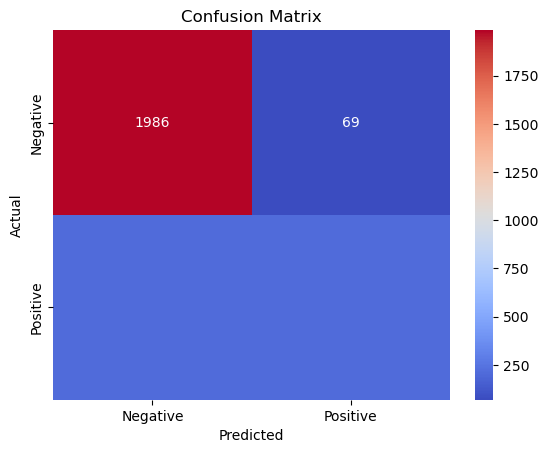

In [23]:
#Visualising confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Result analysis
The **confusion matrix** reveals that we can able to identify both the type of visitors, **visitors who are going to generate revenue** and **visitors who are not going to generate revenue**. We can use this information as follows:

1. Once we can able to identify that the visitors are going to generate revenue, then we do not want to provide any coupons,special prizes and all rather we can give the visitors special points which they can use the next time when they visit. (Using the special points they will get best offers which makes them to stay in the loop of buying products from us)

2. The visitors that are unlikely to make a purchase can be provided with discount coupons so that they are more likely to make a purchase.

# Visualising Training and Validation Accuracies and Losses

Text(0.5, 1.0, 'Training & Validation Accuracy')

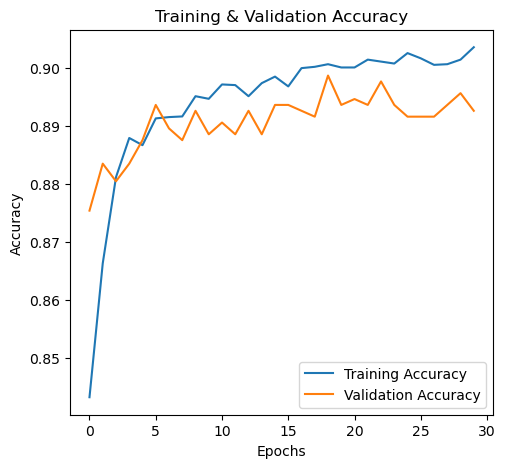

In [24]:
history_dict = history.history

# Plot Accuracy Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

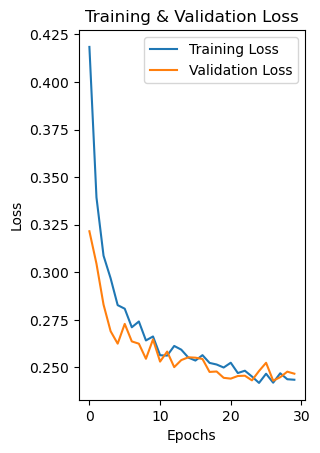

In [25]:
# Plot Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

In [27]:
classifier.save("Intention_prediction.keras")

In [28]:
pip install flask tensorflow numpy

Note: you may need to restart the kernel to use updated packages.


In [30]:
import os
print(os.getcwd())

C:\Users\anush\Downloads
